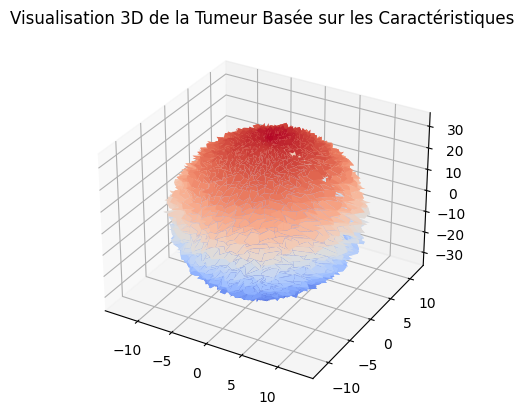

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Exemple de caractéristiques tirées de vos données
radius_mean = 10  # Rayon moyen
texture_mean = 2  # Influence sur l'irrégularité de la surface
perimeter_mean = 30  # Périmètre moyen
area_mean = 100  # Surface moyenne
smoothness_mean = 0.1  # Lissage
compactness_mean = 0.5  # Compactage (irrégularité)
concavity_mean = 0.3  # Concavité
concave_pts_mean = 0.2  # Points concaves

# Création d'une forme de base sphérique influencée par le rayon et le périmètre
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Forme initiale de la tumeur (sphère de base)
x = radius_mean * np.outer(np.cos(u), np.sin(v)) * (1 + concavity_mean * np.random.rand(100, 100))
y = radius_mean * np.outer(np.sin(u), np.sin(v)) * (1 + concave_pts_mean * np.random.rand(100, 100))
z = perimeter_mean * np.outer(np.ones(np.size(u)), np.cos(v)) * (1 + smoothness_mean * np.random.rand(100, 100))

# Ajout de l'effet de texture sur la surface
z += texture_mean * np.sin(u)[np.newaxis].T  # Ajout d'irrégularités via la texture

# Visualisation 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='coolwarm')
ax.set_title("Visualisation 3D de la Tumeur Basée sur les Caractéristiques")
plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Exemple de données
radius_mean = 10  # Rayon moyen
texture_mean = 2  # Texture moyenne
perimeter_mean = 30  # Périmètre moyen
concavity_mean = 0.3
concave_pts_mean = 0.2

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Coordonnées x, y, z de la tumeur
x = radius_mean * np.outer(np.cos(u), np.sin(v)) * (1 + concavity_mean * np.random.rand(100, 100))
y = radius_mean * np.outer(np.sin(u), np.sin(v)) * (1 + concave_pts_mean * np.random.rand(100, 100))
z = perimeter_mean * np.outer(np.ones(np.size(u)), np.cos(v)) * (1 + texture_mean * np.random.rand(100, 100))

# Créer la figure interactive
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])

# Ajouter des détails interactifs
fig.update_layout(title="Visualisation Interactive de la Tumeur", scene=dict(zaxis=dict(title='Périmètre'),
                                      xaxis=dict(title='X-Axis'), yaxis=dict(title='Y-Axis')))

# Afficher la figure interactive
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Charger les données
df = pd.read_csv('brca.csv')

# Sélectionner une tumeur (ex : première ligne)
tumeur = df.iloc[521]

# Extraire les variables importantes
radius = tumeur['x.radius_mean']
perimeter = tumeur['x.perimeter_mean']
smoothness = tumeur['x.smoothness_mean']
concavity = tumeur['x.concavity_mean']
symmetry = tumeur['x.symmetry_mean']
fractal_dim = tumeur['x.fractal_dim_mean']

# Créer une sphère déformée avec du bruit
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Déformer la sphère avec du bruit
r = radius * (1 + concavity * np.sin(2 * phi) * np.cos(2 * theta) + np.random.normal(0, 0.1, theta.shape))

# Coordonnées 3D
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# Créer la surface 3D
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z, colorscale='Viridis')])

# Mettre à jour le layout
fig.update_layout(title='Visualisation 3D de la tumeur avec caractéristiques irrégulières',
                  scene=dict(
                      xaxis_title='X',
                      yaxis_title='Y',
                      zaxis_title='Z'),
                  width=700,
                  margin=dict(r=20, l=10, b=10, t=40))

# Afficher la visualisation
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Charger les données depuis le fichier CSV
# Remplace 'ton_fichier.csv' par le chemin de ton fichier
df = pd.read_csv('brca.csv')

# Créer un histogramme montrant la distribution du rayon moyen
fig = px.histogram(df, x='x.radius_mean', color='y',
                   title='Distribution du Rayon Moyen pour les Tumeurs Bénignes et Malignes',
                   labels={'y': 'Type de tumeur', 'x.radius_mean': 'Rayon moyen'},
                   nbins=50,
                   color_discrete_map={'B': 'rgb(0,200,0)', 'M': 'rgb(200,0,0)'}) # Couleurs personnalisées

# Améliorer l'esthétique
fig.update_layout(
    plot_bgcolor='rgb(240, 240, 240)', # Changer la couleur de fond
    title_font=dict(size=22, color='rgb(50,50,50)'), # Police du titre
    font=dict(family="Arial", size=14)  # Police du texte
)

# Afficher le graphique
fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter(df, x='x.compactness_mean', y='x.concavity_mean', color='y',
                 title='Concavité moyenne vs Compacité moyenne selon le type de tumeur',
                 labels={'x.compactness_mean': 'Compacité moyenne', 'x.concavity_mean': 'Concavité moyenne'})
fig.show()

In [ ]:
fig = px.box(df, x='y', y='x.texture_mean',
             title="Comparaison de la texture moyenne des tumeurs bénignes et malignes",
             labels={'y': 'Type de tumeur', 'x.texture_mean': 'Texture moyenne'})
fig.show()

In [ ]:
import plotly.figure_factory as ff

# Calculer la matrice de corrélation
corr_matrix = df[['x.radius_mean', 'x.texture_mean', 'x.compactness_mean',
                  'x.concavity_mean', 'x.perimeter_mean', 'x.area_mean',
                  'x.smoothness_mean', 'x.symmetry_mean', 'x.fractal_dim_mean']].corr()

# Créer une heatmap
fig = ff.create_annotated_heatmap(z=corr_matrix.values,
                                  x=list(corr_matrix.columns),
                                  y=list(corr_matrix.index),
                                  colorscale='Viridis')

fig.update_layout(title="Heatmap des corrélations entre les caractéristiques tumorales")
fig.show()



In [ ]:
import pandas as pd
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
from sklearn.decomposition import PCA

# Chargement des données
df = pd.read_csv('brca.csv')

# 1. Analyse descriptive des statistiques de base
description = numeric_df.describe()

print(description)

       Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  \
count  569.000000     569.000000      569.000000        569.000000   
mean   285.000000      14.127292       19.289649         91.969033   
std    164.400426       3.524049        4.301036         24.298981   
min      1.000000       6.981000        9.710000         43.790000   
25%    143.000000      11.700000       16.170000         75.170000   
50%    285.000000      13.370000       18.840000         86.240000   
75%    427.000000      15.780000       21.800000        104.100000   
max    569.000000      28.110000       39.280000        188.500000   

       x.area_mean  x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
count   569.000000         569.000000          569.000000        569.000000   
mean    654.889104           0.096360            0.104341          0.088799   
std     351.914129           0.014064            0.052813          0.079720   
min     143.500000           0.052630            0.01

In [ ]:
tumor_counts = df['y'].value_counts()

# Afficher les résultats
print("Nombre de tumeurs par type :")
print(tumor_counts)

Nombre de tumeurs par type :
y
B    357
M    212
Name: count, dtype: int64


In [ ]:
import numpy as np
from scipy.stats import t

# Exemple de données (remplace ces valeurs par tes données réelles)
group_benin = np.array([10.0, 11.5, 12.1, 11.0, 10.8])  # Remplace par tes données réelles
group_malin = np.array([15.2, 14.8, 16.1, 15.5, 17.0])  # Remplace par tes données réelles


# 1. Calculer la moyenne
mean_benin = np.mean(group_benin)
mean_malin = np.mean(group_malin)

# 2. Calculer l'écart type
std_benin = np.std(group_benin, ddof=1)  # ddof=1 pour l'échantillon
std_malin = np.std(group_malin, ddof=1)

# 3. Calculer la taille de chaque échantillon
n_benin = len(group_benin)
n_malin = len(group_malin)

# 4. Calculer la statistique du test t
t_statistic = (mean_benin - mean_malin) / np.sqrt((std_benin**2 / n_benin) + (std_malin**2 / n_malin))

# 5. Calculer la p-value
df = n_benin + n_malin - 2  # Degrés de liberté
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))  # p-value pour le test bilatéral

# Afficher les résultats
print(f"Moyenne Bénigne : {mean_benin}")
print(f"Moyenne Maligne : {mean_malin}")
print(f"Écart Type Bénin : {std_benin}")
print(f"Écart Type Malin : {std_malin}")
print(f"Statistique T : {t_statistic}")
print(f"p-value : {p_value}")

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("Il y a une différence significative entre les tumeurs bénignes et malignes.")
else:
    print("Il n'y a pas de différence significative entre les tumeurs bénignes et malignes.")

Moyenne Bénigne : 11.080000000000002
Moyenne Maligne : 15.719999999999999
Écart Type Bénin : 0.7854934754662191
Écart Type Malin : 0.8584870412533903
Statistique T : -8.916484327479415
p-value : 1.984481528527482e-05
Il y a une différence significative entre les tumeurs bénignes et malignes.
